# K-Means Clustering: Implementasi Praktis

Dalam tutorial ini, kita akan mengimplementasikan K-Means Clustering pada dataset dunia nyata. Kita akan menggunakan dataset Mall Customer Segmentation yang berisi informasi tentang pelanggan mall untuk melakukan segmentasi pelanggan.

## Apa yang akan kita pelajari?
1. Persiapan dan Eksplorasi Data
2. Preprocessing Data
3. Implementasi K-Means
4. Visualisasi Hasil
5. Analisis dan Interpretasi Cluster
6. Rekomendasi Bisnis

Mari kita mulai dengan mempersiapkan lingkungan dan data yang diperlukan!

In [34]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Set random seed untuk reproducibility
np.random.seed(42)

In [35]:
# Membuat dataset mall customer
np.random.seed(42)
n_customers = 200

# Generate data pelanggan
data = {
    'CustomerID': range(1, n_customers + 1),
    'Age': np.random.normal(35, 12, n_customers).astype(int),
    'Annual_Income': np.random.normal(60000, 20000, n_customers).astype(int),
    'Spending_Score': np.random.normal(50, 25, n_customers).astype(int)
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Memastikan nilai masuk akal
df['Age'] = df['Age'].clip(18, 70)
df['Annual_Income'] = df['Annual_Income'].clip(20000, 120000)
df['Spending_Score'] = df['Spending_Score'].clip(1, 100)

# Tampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None

Statistik Deskriptif:
       CustomerID         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   34.335000   61770.655000       47.385000
std     57.879185   10.566981   19063.821436       23.979404
min      1.000000   18.000000   20000.000000        1.000000
25%     50.750000   26.000000   47882.750000       30.000000
50%    100.500000   34.500000   61576.500000       47.500000
75%    150.250000   40.250000   73744.250000       64.000000
max    200.000000   67.000000  120000.000000      100.000000


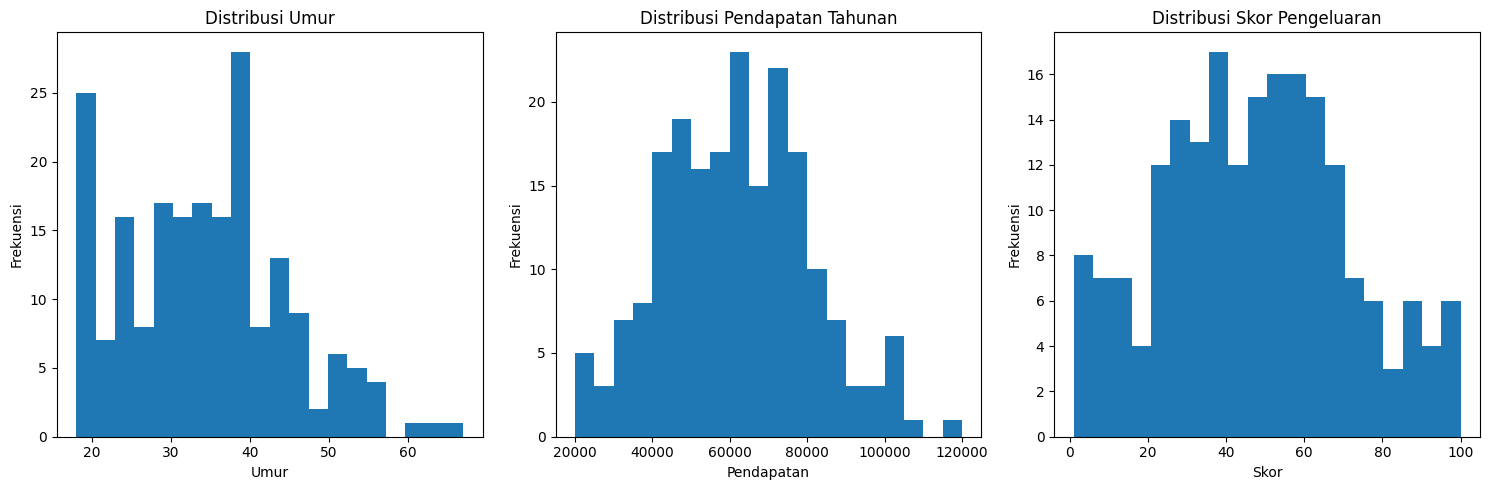

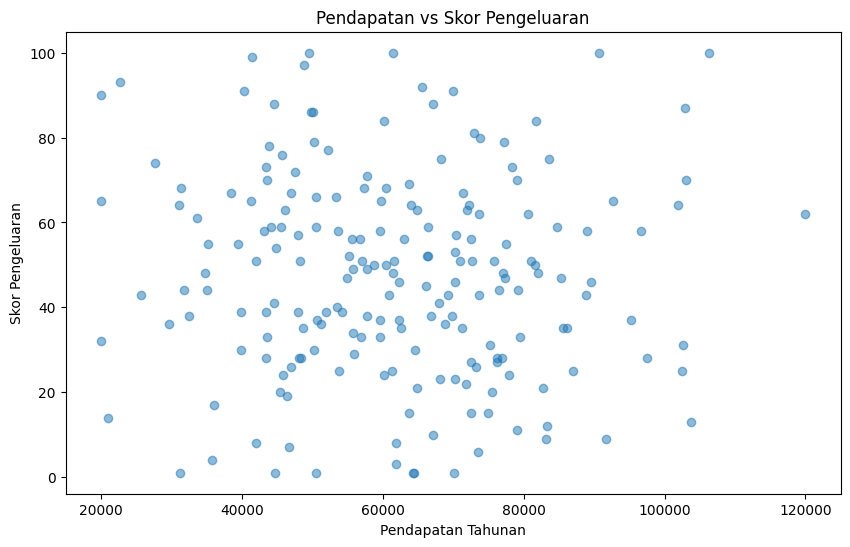

In [36]:
# Visualisasi distribusi variabel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot distribusi Age
axes[0].hist(df['Age'], bins=20)
axes[0].set_title('Distribusi Umur')
axes[0].set_xlabel('Umur')
axes[0].set_ylabel('Frekuensi')

# Plot distribusi Annual Income
axes[1].hist(df['Annual_Income'], bins=20)
axes[1].set_title('Distribusi Pendapatan Tahunan')
axes[1].set_xlabel('Pendapatan')
axes[1].set_ylabel('Frekuensi')

# Plot distribusi Spending Score
axes[2].hist(df['Spending_Score'], bins=20)
axes[2].set_title('Distribusi Skor Pengeluaran')
axes[2].set_xlabel('Skor')
axes[2].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Scatter plot Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], alpha=0.5)
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Skor Pengeluaran')
plt.title('Pendapatan vs Skor Pengeluaran')
plt.show()

## Preprocessing Data

Sebelum menerapkan K-Means, kita perlu melakukan preprocessing data:
1. Memilih fitur yang akan digunakan
2. Melakukan standardisasi data
3. Menentukan jumlah cluster optimal menggunakan Elbow Method

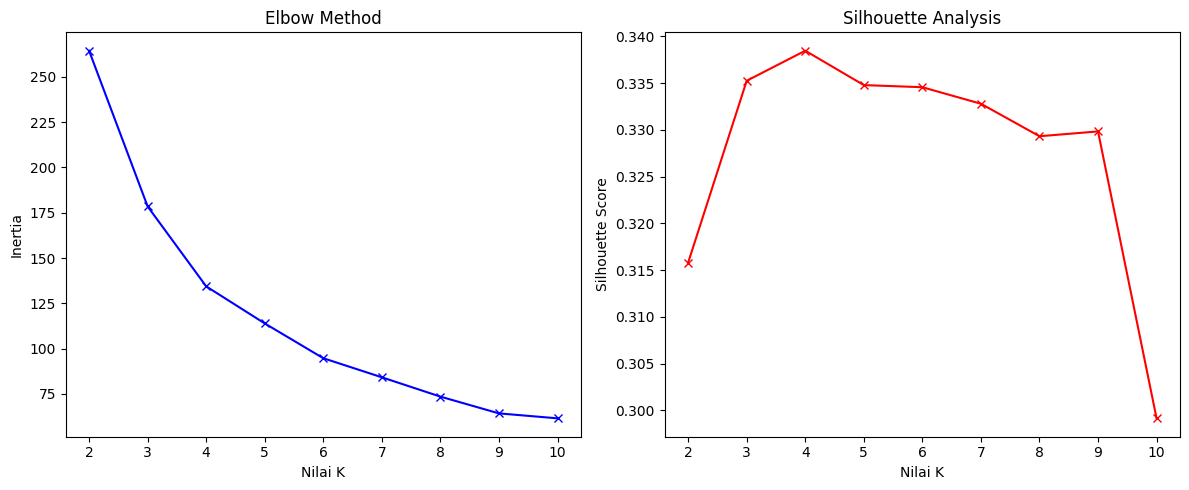


Nilai K optimal berdasarkan Silhouette Score: 4
Silhouette Score maksimum: 0.338


In [37]:
# Pilih fitur untuk clustering
features = ['Annual_Income', 'Spending_Score']
X = df[features]

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementasi Elbow Method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Hitung inertia
    inertias.append(kmeans.inertia_)
    
    # Hitung silhouette score
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

# Plot 1: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot 2: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('Nilai K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

# Print optimal K berdasarkan silhouette score
optimal_k = K[np.argmax(silhouette_scores)]
print(f"\nNilai K optimal berdasarkan Silhouette Score: {optimal_k}")
print(f"Silhouette Score maksimum: {max(silhouette_scores):.3f}")

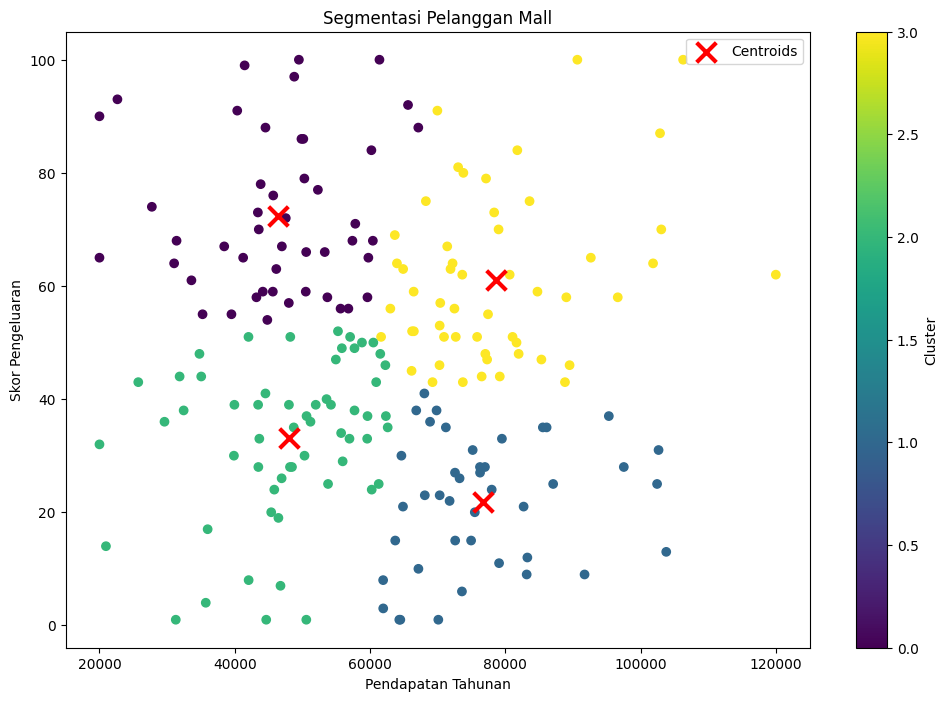


Analisis Cluster:

Cluster 0:
Jumlah pelanggan: 47
Rata-rata Pendapatan: $46,403.17
Rata-rata Skor Pengeluaran: 72.36
Rata-rata Umur: 31.98 tahun

Cluster 1:
Jumlah pelanggan: 42
Rata-rata Pendapatan: $76,742.52
Rata-rata Skor Pengeluaran: 21.83
Rata-rata Umur: 36.48 tahun

Cluster 2:
Jumlah pelanggan: 58
Rata-rata Pendapatan: $47,986.62
Rata-rata Skor Pengeluaran: 33.19
Rata-rata Umur: 35.00 tahun

Cluster 3:
Jumlah pelanggan: 53
Rata-rata Pendapatan: $78,618.34
Rata-rata Skor Pengeluaran: 61.02
Rata-rata Umur: 34.00 tahun


In [38]:
# Implementasi K-Means dengan K optimal
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = optimal_kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))

# Plot points
scatter = plt.scatter(df['Annual_Income'], df['Spending_Score'], 
                     c=df['Cluster'], cmap='viridis')

# Plot centroids
centroids = scaler.inverse_transform(optimal_kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', 
           s=200, linewidths=3, label='Centroids')

plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Skor Pengeluaran')
plt.title('Segmentasi Pelanggan Mall')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()

# Analisis cluster
print("\nAnalisis Cluster:")
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Jumlah pelanggan: {len(cluster_data)}")
    print(f"Rata-rata Pendapatan: ${cluster_data['Annual_Income'].mean():,.2f}")
    print(f"Rata-rata Skor Pengeluaran: {cluster_data['Spending_Score'].mean():.2f}")
    print(f"Rata-rata Umur: {cluster_data['Age'].mean():.2f} tahun")

## Interpretasi Hasil dan Rekomendasi Bisnis

Berdasarkan hasil clustering, kita dapat mengidentifikasi 4 segmen pelanggan yang berbeda:

### 1. Cluster 0 - "High Spenders with Moderate Income"
- **Karakteristik**:
  - Pendapatan menengah ke bawah ($46,403)
  - Skor pengeluaran tinggi (72.36)
  - Rata-rata umur termuda (32 tahun)
- **Rekomendasi**:
  - Tawarkan program loyalitas untuk mempertahankan pola belanja
  - Berikan reward untuk pembelian berulang
  - Fokus pada produk trendy dan lifestyle

### 2. Cluster 1 - "Conservative High Earners"
- **Karakteristik**:
  - Pendapatan tinggi ($76,743)
  - Skor pengeluaran sangat rendah (21.83)
  - Rata-rata umur tertinggi (36.5 tahun)
- **Rekomendasi**:
  - Tawarkan produk premium dengan value proposition yang jelas
  - Berikan edukasi tentang kualitas produk
  - Program special discount untuk pembelian pertama

### 3. Cluster 2 - "Budget Conscious"
- **Karakteristik**:
  - Pendapatan menengah ke bawah ($47,987)
  - Skor pengeluaran rendah (33.19)
  - Umur rata-rata 35 tahun
- **Rekomendasi**:
  - Fokus pada promosi dan diskon
  - Tawarkan produk dengan harga terjangkau
  - Program bundling untuk meningkatkan nilai pembelian

### 4. Cluster 3 - "Premium Shoppers"
- **Karakteristik**:
  - Pendapatan tertinggi ($78,618)
  - Skor pengeluaran tinggi (61.02)
  - Umur rata-rata 34 tahun
- **Rekomendasi**:
  - Fokus pada produk premium dan eksklusif
  - Berikan layanan VIP dan personal shopping
  - Program membership dengan benefit eksklusif

### Rekomendasi Umum:

1. **Personalisasi Marketing**:
   - Sesuaikan strategi marketing untuk setiap cluster
   - Gunakan channel komunikasi yang berbeda
   - Customize konten promosi

2. **Pengembangan Produk**:
   - Sesuaikan mix produk dengan karakteristik setiap cluster
   - Kembangkan private label untuk segmen tertentu
   - Optimalkan inventory berdasarkan pola pembelian

3. **Program Loyalitas**:
   - Desain program rewards yang berbeda untuk setiap cluster
   - Berikan insentif yang sesuai dengan karakteristik cluster
   - Monitor dan evaluasi efektivitas program

4. **Layout Toko**:
   - Atur tata letak berdasarkan pola shopping
   - Optimalkan product placement
   - Sesuaikan visual merchandising

### Langkah Selanjutnya:

1. **Monitoring dan Evaluasi**:
   - Pantau perubahan perilaku pelanggan
   - Evaluasi efektivitas strategi
   - Update segmentasi secara berkala

2. **Pengembangan Database**:
   - Tambahkan data demografis lain
   - Koleksi data preferensi produk
   - Track response terhadap promosi

3. **Implementasi Bertahap**:
   - Mulai dari quick wins
   - Test strategi pada sample kecil
   - Scale up yang berhasil

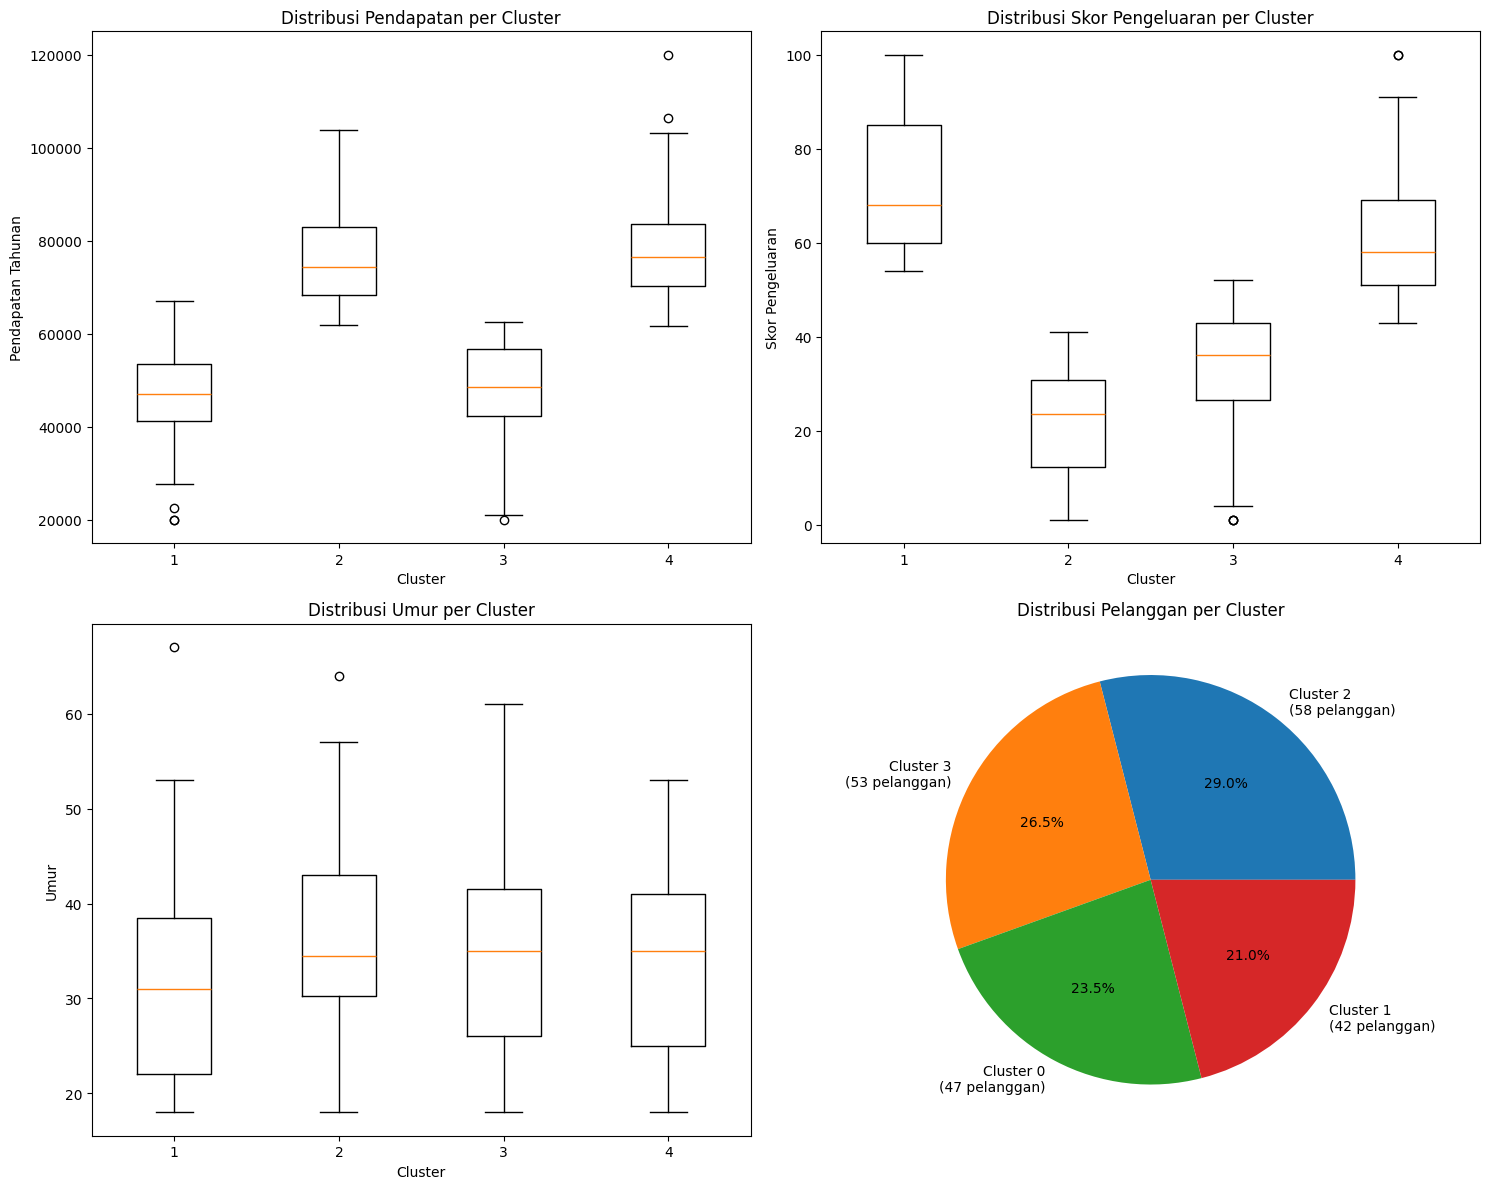


Statistik Ringkas per Cluster:
          Age                                                       \
        count       mean        std   min    25%   50%   75%   max   
Cluster                                                              
0        47.0  31.978723  10.991082  18.0  22.00  31.0  38.5  67.0   
1        42.0  36.476190  10.504907  18.0  30.25  34.5  43.0  64.0   
2        58.0  35.000000  10.951248  18.0  26.00  35.0  41.5  61.0   
3        53.0  34.000000   9.625687  18.0  25.00  35.0  41.0  53.0   

        Annual_Income                ...                     Spending_Score  \
                count          mean  ...       75%       max          count   
Cluster                              ...                                      
0                47.0  46403.170213  ...  53501.50   67140.0           47.0   
1                42.0  76742.523810  ...  83049.25  103796.0           42.0   
2                58.0  47986.620690  ...  56712.00   62614.0           58.0   
3  

In [39]:
# Visualisasi karakteristik cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Box plot pendapatan per cluster
axes[0, 0].boxplot([df[df['Cluster'] == i]['Annual_Income'] for i in range(optimal_k)])
axes[0, 0].set_title('Distribusi Pendapatan per Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Pendapatan Tahunan')

# Plot 2: Box plot skor pengeluaran per cluster
axes[0, 1].boxplot([df[df['Cluster'] == i]['Spending_Score'] for i in range(optimal_k)])
axes[0, 1].set_title('Distribusi Skor Pengeluaran per Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Skor Pengeluaran')

# Plot 3: Box plot umur per cluster
axes[1, 0].boxplot([df[df['Cluster'] == i]['Age'] for i in range(optimal_k)])
axes[1, 0].set_title('Distribusi Umur per Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Umur')

# Plot 4: Pie chart jumlah pelanggan per cluster
cluster_sizes = df['Cluster'].value_counts()
axes[1, 1].pie(cluster_sizes, labels=[f'Cluster {i}\n({v} pelanggan)' 
                                     for i, v in cluster_sizes.items()],
               autopct='%1.1f%%')
axes[1, 1].set_title('Distribusi Pelanggan per Cluster')

plt.tight_layout()
plt.show()

# Tampilkan statistik ringkas per cluster
print("\nStatistik Ringkas per Cluster:")
print(df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].describe())

## Penggunaan Model untuk Prediksi

Mari kita lihat bagaimana model dapat digunakan untuk memprediksi cluster pelanggan baru. Ini berguna untuk:
1. Segmentasi pelanggan baru secara otomatis
2. Personalisasi layanan real-time
3. Automasi marketing campaign

In [40]:
# Fungsi untuk memprediksi cluster pelanggan baru
def predict_customer_segment(income, spending):
    # Standardisasi input
    X_new = np.array([[income, spending]])
    X_new_scaled = scaler.transform(X_new)
    
    # Prediksi cluster
    cluster = optimal_kmeans.predict(X_new_scaled)[0]
    
    # Definisi karakteristik cluster
    cluster_characteristics = {
        0: "High Spenders with Moderate Income",
        1: "Conservative High Earners",
        2: "Budget Conscious",
        3: "Premium Shoppers"
    }
    
    return cluster, cluster_characteristics[cluster]

# Contoh penggunaan
test_customers = [
    (50000, 70),   # Pendapatan menengah, pengeluaran tinggi
    (90000, 30),   # Pendapatan tinggi, pengeluaran rendah
    (45000, 30),   # Pendapatan menengah, pengeluaran rendah
    (85000, 65)    # Pendapatan tinggi, pengeluaran tinggi
]

print("Prediksi Segmen Pelanggan Baru:")
print("\nFormat: (Pendapatan Tahunan, Skor Pengeluaran)")
for income, spending in test_customers:
    cluster, description = predict_customer_segment(income, spending)
    print(f"\nPelanggan dengan pendapatan ${income:,} dan skor pengeluaran {spending}:")
    print(f"Cluster: {cluster} - {description}")

Prediksi Segmen Pelanggan Baru:

Format: (Pendapatan Tahunan, Skor Pengeluaran)

Pelanggan dengan pendapatan $50,000 dan skor pengeluaran 70:
Cluster: 0 - High Spenders with Moderate Income

Pelanggan dengan pendapatan $90,000 dan skor pengeluaran 30:
Cluster: 1 - Conservative High Earners

Pelanggan dengan pendapatan $45,000 dan skor pengeluaran 30:
Cluster: 2 - Budget Conscious

Pelanggan dengan pendapatan $85,000 dan skor pengeluaran 65:
Cluster: 3 - Premium Shoppers


/home/dihak/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Kesimpulan

Dalam implementasi K-Means Clustering ini, kita telah:
1. Melakukan analisis dan preprocessing data pelanggan mall
2. Menentukan jumlah cluster optimal menggunakan Elbow Method dan Silhouette Analysis
3. Mengimplementasikan K-Means Clustering
4. Menganalisis karakteristik setiap cluster
5. Membuat rekomendasi bisnis berdasarkan hasil clustering
6. Membuat sistem prediksi untuk pelanggan baru

### Poin Penting:
1. K-Means sangat berguna untuk segmentasi pelanggan
2. Preprocessing dan standardisasi data sangat penting
3. Interpretasi hasil harus mempertimbangkan konteks bisnis
4. Model dapat digunakan untuk prediksi real-time

## Latihan

1. **Eksperimen dengan Feature**:
   - Tambahkan fitur demografis lain
   - Coba kombinasi feature yang berbeda
   - Analisis pengaruh setiap feature

2. **Optimasi Model**:
   - Coba metode clustering lain (DBSCAN, Hierarchical Clustering)
   - Eksperimen dengan parameter berbeda
   - Bandingkan hasil clustering

3. **Analisis Bisnis**:
   - Buat strategi marketing untuk setiap cluster
   - Hitung potential revenue per cluster
   - Desain program loyalitas khusus

4. **Visualisasi**:
   - Buat dashboard interaktif
   - Tambahkan visualisasi 3D
   - Visualisasikan perubahan cluster overtime

## Referensi
1. Scikit-learn documentation: https://scikit-learn.org/stable/modules/clustering.html
2. K-Means Clustering Algorithm: https://en.wikipedia.org/wiki/K-means_clustering
3. Customer Segmentation: https://hbr.org/2014/07/making-sense-of-customer-segmentation